In [2]:
import numpy as np
import pandas as pd
import time
import tqdm
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pymorphy2
import warnings
warnings.filterwarnings("ignore")

In [16]:
import matplotlib
import artm
import nltk
import feedparser
from nltk.corpus import stopwords
"""nltk.download('stopwords')
nltk.download('punkt')
nltk.download()"""

"nltk.download('stopwords')\nnltk.download('punkt')\nnltk.download()"

In [4]:
data = pd.read_csv('gender-tense_data.csv');
data = data.fillna('')

In [5]:
data['Анамнез заболевания'].apply(lambda x: np.log(len(x)+1)).hist(bins=100);

In [6]:
pd.options.display.max_colwidth = 1000

In [7]:
morph = pymorphy2.MorphAnalyzer()

In [8]:
data.tail()

,Unnamed: 0,ID,Код_диагноза,Диагноз,Возраст,Пол,Общее состояние,аллергия,Анамнез заболевания,Внешний осмотр,Revisit,lemm,text,past,pres,futr,male,female
283081,283081,283081,E04.1,Нетоксический одноузловой зоб,46,2,,,Травма 3нед. назад - упала на улице. Обращалась в РТП - рентгенография. 2 нед иммобилизации лев.лучезапястного сустава ортезом.,,1,травма нед назад упасть на улица обращаться в ртп рентгенография нед иммобилизация левлучезапястный сустав ортез,травма нед назад упала на улице обращалась в ртп рентгенография нед иммобилизации левлучезапястного сустава ортезом,2,0,0,0,2
283082,283082,283082,Z01.4,Гинекологическое обследование (общее) (рутинное),68,2,Состояние удовлетворительное .,не отягощен,,,1,,,0,0,0,0,0
283083,283083,283083,H16,Кератит,36,1,,Аллергию на лекарства - отрицает,,,1,,,0,0,0,0,0
283084,283084,283084,J00,Острый назофарингит (насморк),33,2,,,"обратилась для осмотра при беременности 35 недель. Течение беременности с угрозой прерывания в последний месяц на фоне повышенного тонуса матки, ЖДА в августе, принимала ферро-фольгамму месяц. . За время беременности набрала около 9-ти кг веса. В анамнезе- ДЖВП на фоне дисформии ЖП, хр. гастродуоденит",,1,обратиться для осмотр при беременность неделя течение беременность с угроза прерывание в последний месяц на фон повышенный тонус матка жда в август принимать феррофольгамма месяц за время беременность набрать около ти килограмм вес в анамнез джвп на фон дисформия жп хр гастродуоденит,обратилась для осмотра при беременности недель течение беременности с угрозой прерывания в последний месяц на фоне повышенного тонуса матки жда в августе принимала феррофольгамму месяц за время беременности набрала около ти кг веса в анамнезе джвп на фоне дисформии жп хр гастродуоденит,3,0,0,0,3
283085,283085,283085,N11,Хронический тубулоинтерстициальный нефрит,42,2,,,без дополнений.,,1,без дополнение,без дополнений,0,0,0,0,0


In [12]:
"""X_diag = data['Диагноз']
X_ana = data['Анамнез заболевания']
X_vnosm = data['Внешний осмотр']
X_age = data['Возраст'].values
X_sex = data['Пол'].values


n_samples = len(X_diag.values)
print(n_samples)
corpus = np.hstack((X_diag.values, X_vnosm))
vectorizer = CountVectorizer(min_df = 3/(2*len(corpus)), token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+',
                             max_features = 10000, ngram_range=(1,2))
#vectorizer = CountVectorizer(min_df = 3/(2*len(corpus)), max_features = 10000, stop_words = ['NaN'])
print(corpus.shape)
D = vectorizer.fit_transform(corpus)
dict = vectorizer.get_feature_names()
print(len(dict))
"""

283086
(566172,)
9954


In [10]:
X_text = data['text']
corpus = X_text.values
vectorizer = CountVectorizer(min_df = 2)
D = vectorizer.fit(corpus)
len(D.vocabulary_)

44144

In [43]:
X_lemm = data['lemm']
corpus = X_lemm.values
vectorizer = CountVectorizer(min_df = 2)
D2 = vectorizer.fit(corpus)
len(D2.vocabulary_)

27117

In [12]:
stop_eng = nltk.corpus.stopwords.words('english')
stop_rus = nltk.corpus.stopwords.words('russian')

In [13]:
stop_rus[0:30]

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне']

In [14]:
all_text = np.concatenate(data['text'].apply (lambda s: s.strip().split()))
all_lemm = np.concatenate(data['lemm'].apply (lambda s: s.strip().split()))

In [15]:
all_words = set(all_text)
all_words_lemm = set(all_lemm)

In [16]:
print('number all words lemm:', len(all_words_lemm))

number all words lemm: 63589


In [17]:
print('number all words:', len(all_words))

number all words: 95559


In [18]:
count = pd.Series(all_lemm).value_counts()

In [19]:
count

в                                         210302
с                                         137761
год                                        91132
на                                         89960
не                                         83702
по                                         69093
боль                                       61111
и                                          52113
лечение                                    51578
течение                                    45811
жалоба                                     45730
день                                       38762
беспокоить                                 35911
обследование                               35177
к                                          32878
неделя                                     31411
отмечать                                   31088
около                                      30885
фон                                        30719
обратиться                                 28858
принимать           

In [38]:
#count[count == 1].index.head(100).to_csv('100_one_time.csv')
one_time = pd.Series(all_lemm)[pd.Series(all_lemm).isin(pd.Series(all_lemm).value_counts()[pd.Series(all_lemm).value_counts() == 1].index)]


In [39]:
one_time.head(100).to_csv('100_one_time.csv', index = False, encoding='cp1251')

In [44]:
one100 = pd.read_csv('100_one_time.csv', encoding='cp1251');
one100.head()

,физиотерап
0,гигантоклеточный
1,остеокластома
2,дерматографический
3,первичныка
4,эзофагнит


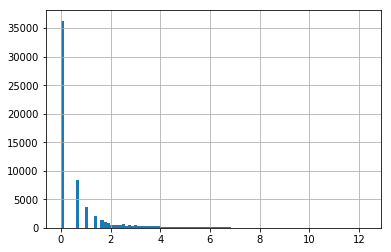

In [45]:
count.apply(lambda x: np.log(x)).hist(bins=100);

In [46]:
words_ser = pd.Series(all_lemm)
without_stop = words_ser[~words_ser.isin(stop_rus)]

In [125]:
count2 = without_stop.value_counts()
#count2

год                    91132
боль                   61111
лечение                51578
течение                45811
жалоба                 45730
день                   38762
беспокоить             35911
обследование           35177
неделя                 31411
отмечать               31088
около                  30885
фон                    30719
обратиться             28858
принимать              28579
назад                  26651
месяц                  25537
последний              23613
лечиться               23297
самостоятельно         23158
появиться              21445
терапия                19818
связывать              19373
провести               18991
консультация           18065
результат              17925
дать                   17352
х                      16951
приём                  16240
больной                15961
эффект                 15720
                       ...  
гиперинсулинизм            1
найстойка                  1
фолиминт                   1
новосепт      

In [47]:
without_stop.value_counts().value_counts().head(20)

1     36295
2      8448
3      3623
4      2085
5      1382
6       973
7       810
8       577
9       512
10      439
11      411
12      330
13      264
14      249
15      230
17      199
16      176
19      162
18      162
20      152
dtype: int64

In [58]:
#вместо 1 можно поставить любое число, которое мы бцдем считать слишком редкое
without_rare = without_stop[without_stop.isin(without_stop.value_counts()[without_stop.value_counts() > 7].index)]

In [59]:
print(len(set(without_rare)))
print(len(without_rare))
without_rare.value_counts()

9873
3292659


год                                   91132
боль                                  61111
лечение                               51578
течение                               45811
жалоба                                45730
день                                  38762
беспокоить                            35911
обследование                          35177
неделя                                31411
отмечать                              31088
около                                 30885
фон                                   30719
обратиться                            28858
принимать                             28579
назад                                 26651
месяц                                 25537
последний                             23613
лечиться                              23297
самостоятельно                        23158
появиться                             21445
терапия                               19818
связывать                             19373
провести                        

In [49]:
without_rare.dtype

dtype('O')

In [61]:
#удалим очень короткие слова
def long_words(text):

    result = []
    for word in text.split():
        if len(word) > 2:
            #print(word)
            result.append(word)
                              
    return ' '.join(result)


In [62]:
no_short = without_rare.apply(long_words)

In [63]:
no_short.value_counts()

                      93167
год                   91132
боль                  61111
лечение               51578
течение               45811
жалоба                45730
день                  38762
беспокоить            35911
обследование          35177
неделя                31411
отмечать              31088
около                 30885
фон                   30719
обратиться            28858
принимать             28579
назад                 26651
месяц                 25537
последний             23613
лечиться              23297
самостоятельно        23158
появиться             21445
терапия               19818
связывать             19373
провести              18991
консультация          18065
результат             17925
дать                  17352
приём                 16240
больной               15961
эффект                15720
                      ...  
сексуальный               8
колбаска                  8
хумулина                  8
слюноотделение            8
грибов              

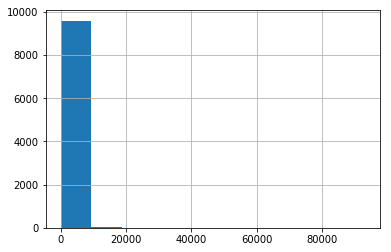

In [64]:
no_short.value_counts().hist();

In [65]:
no_short.to_csv('no_short.csv', index = False, encoding='cp1251')

In [66]:
sos = pd.read_csv('no_short.csv', encoding='cp1251');

In [ ]:
len(sos)

All frequencies, including STOPWORDS:
              Word  Frequency
0                в     210302
1                с     137761
2              год      91132
3               на      89960
4               не      83702
5               по      69093
6             боль      61111
7                и      52113
8          лечение      51578
9          течение      45811
10          жалоба      45730
11            день      38762
12      беспокоить      35911
13    обследование      35177
14               к      32878
15          неделя      31411
16        отмечать      31088
17           около      30885
18             фон      30719
19      обратиться      28858
20       принимать      28579
21           назад      26651
22           месяц      25537
23           после      24727
24       последний      23613
25        лечиться      23297
26  самостоятельно      23158
27       появиться      21445
28             без      21152
29             для      20825
..             ...        ...
40

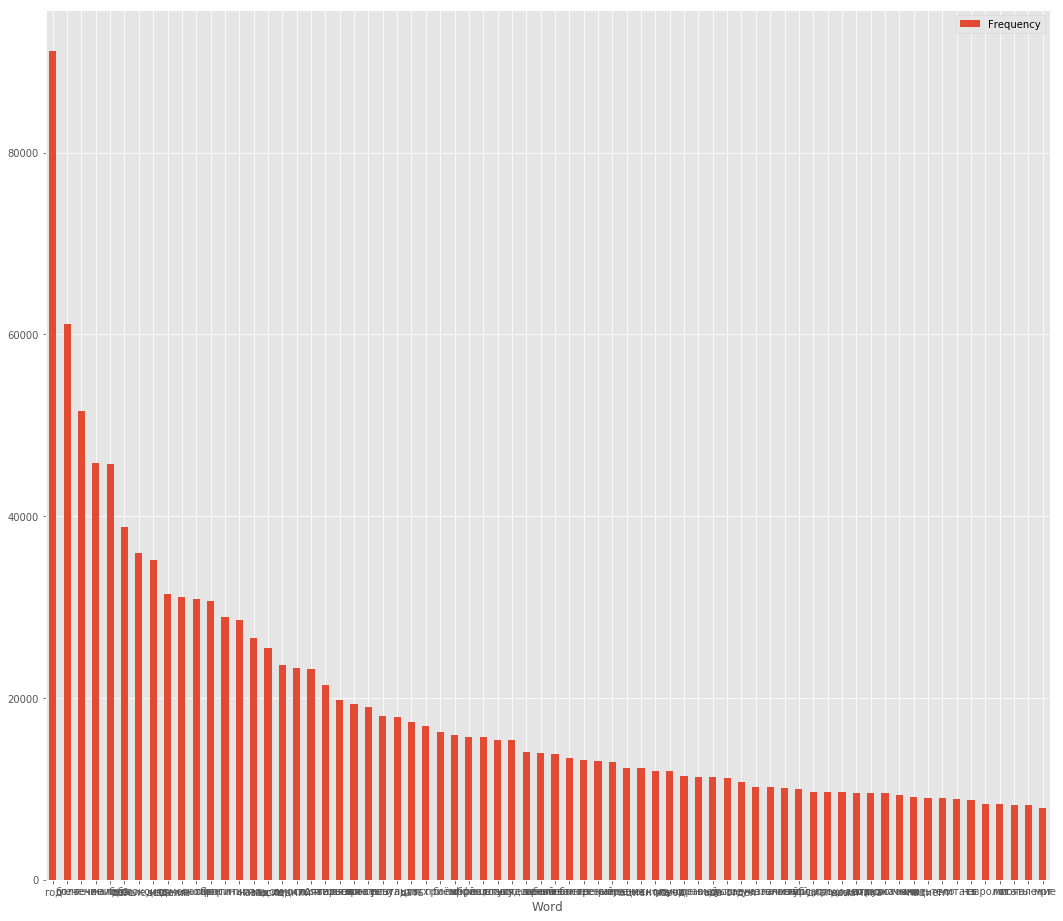

In [18]:
txt = data.lemm.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('russian')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(70),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(70),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0, figsize=(18, 16))